# Nama  : Sahriar Hilmi
# Nim   : 21/478471/PA/20748
# Tugas : Assignment 1 Sistem Kendali

In [1]:
# Install module
%pip install slycot
%pip install control

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import module
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as matlab
from ipywidgets import interact

In [3]:
# fungsi menampilkan hasil second order
def secondOrder(T):
    # definisi plot
    fig, (step, impulse, ramp) = plt.subplots(1, 3, figsize=(16, 8))

    # definisi fungsi step response
    s = matlab.tf('s')
    num = np.array([1])
    denum = np.array([T, T/16, 1])
    G = matlab.tf(num, denum)

    # transfer function
    print("transfer function: ",G )

    # step response
    step_out, T = matlab.step(G)
    step.plot(T, step_out, label = 'Step')
    step.set_title('Step Response')
    step.set_xlabel('Time (seconds)')
    step.set_ylabel('Amplitude')
    step.grid()
    step.legend()

    # impulse response
    ramp_out, T = matlab.step(G/s)
    ramp.plot(np.linspace(T[0], T[len(T)-1]), np.linspace(T[0], T[len(T)-1]), label = 'ideal')
    ramp.plot(T, ramp_out, label = 'Ramp')
    ramp.set_title('Ramp Response')
    ramp.set_xlabel('Time (seconds)')
    ramp.set_ylabel('Amplitude')
    ramp.grid()
    ramp.legend()

    # impulse response
    impulse_out, T = matlab.impulse(G)
    impulse.plot(T, impulse_out, label = 'Impulse')
    impulse.set_title('Impulse Response')
    impulse.set_xlabel('Time (seconds)')
    impulse.set_ylabel('Amplitude')
    impulse.grid()
    impulse.legend()

    # menampilkan plot
    plt.show()

    # menampilkan hasil
    stepInfo = matlab.stepinfo(G)
    print('Rise Time: ', stepInfo['RiseTime'])
    print('Settling Time: ', stepInfo['SettlingTime'])
    print('Overshoot: ', stepInfo['Overshoot'])
    print('Steady-state Error', np.abs(0.5 - step_out[len(step_out) - 1]))

transfer function:  
        1
------------------
s^2 + 0.0625 s + 1



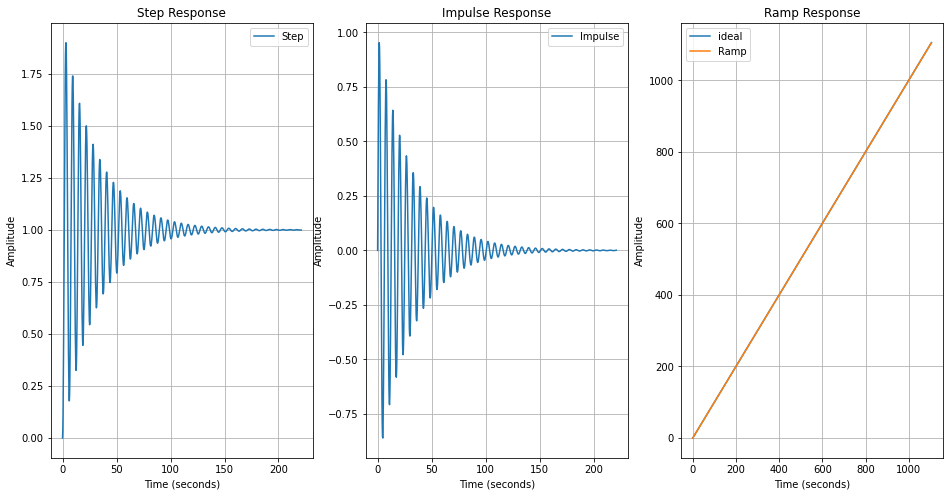

Rise Time:  1.0047644042155834
Settling Time:  123.08363951640897
Overshoot:  89.96874093160766
Steady-state Error 0.49945730381065556


In [4]:
# menampilkan second order response dengan T = 1
secondOrder(1)

In [5]:
interact(secondOrder, T=(1.0, 9.0))

interactive(children=(FloatSlider(value=5.0, description='T', max=9.0, min=1.0), Output()), _dom_classes=('wid…

<function __main__.secondOrder(T)>